Goal is to determine whether a student would continue his/her schooling or dropout. 
Future dropout rates and ways to minimize this, was the ultimate goal of the data collection.

# Data Imbalace

## definition

Data Imbalance - is a scenario where he number of observations belonging to one class is significantly lower than those belonging to the other classes. This problem is mostly common on crucial anomaly detection scenarios such as fraudulent transactions in banks, identification of rare diseases and many classification problems.

## Why do we balance data

In to avoid fractuation of outcomes.When we train on an imbalanced datasetthe reason we get 90% accuracy on an imbalanced data (with 90% of the instances in Class-1) is because our models look at the data and cleverly decide that the best thing to do is to always predict “Class-1” and achieve high accuracy.

This is best seen when using a simple rule based algorithm. If you print out the rule in the final model you will see that it is very likely predicting one class regardless of the data it is asked to predict

## What data are we balancing

When the target columns has unequal ratios between classes.Most classification data sets do not have exactly equal number of instances in each class, but a small difference often does not matter.

## method used to solve data imbalace

1) **More data collection**

You might think it’s silly, but collecting more data is almost always overlooked.

Can you collect more data? Take a second and think about whether you are able to gather more data on your problem.

A larger dataset might expose a different and perhaps more balanced perspective on the classes.

More examples of minor classes may be useful later when we look at resampling your dataset.

2) **By changing Performance Metric**

Accuracy is not the metric to use when working with an imbalanced dataset. We have seen that it is misleading.

There are metrics that have been designed to tell you a more truthful story when working with imbalanced classes.
such algorithms to use are kappa and ROC curves

3) **Resampling** 

You can change the dataset that you use to build your predictive model to have more balanced data.
This change is called sampling your dataset and there are two main methods that you can use to even-up the classes:
You can add copies of instances from the under-represented class called over-sampling (or more formally sampling with replacement), or
You can delete instances from the over-represented class, called under-sampling.
    
4)**Synthetic Minority Over-sampling Technique (SMOTE)**

SMOTE is an oversampling method. It works by creating synthetic samples from the minor class instead of creating copies. The algorithm selects two or more similar instances (using a distance measure) and perturbing an instance one attribute at a time by a random amount within the difference to the neighboring instances.

5) **Penalized Models**

You can use the same algorithms but give them a different perspective on the problem.

Penalized classification imposes an additional cost on the model for making classification mistakes on the minority class during training. These penalties can bias the model to pay more attention to the minority class.

Often the handling of class penalties or weights are specialized to the learning algorithm. There are penalized versions of algorithms such as penalized-SVM and penalized-LDA.


**I will use Resemblig method to balance data**

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Exploration

In [2]:
data=pd.read_csv("train_data_week_1_challenge.csv")
data.head(6)


,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,continue,s01746,M,BC,0.666,0.468,0.666,7,6,other,True,305,354,86.0,1986.0
1,continue,s16986,M,BC,0.172,0.420,0.172,8,10,mother,False,331,516,15.0,1996.0
2,continue,s00147,F,BC,0.212,0.601,0.212,1,4,mother,False,311,209,14.0,1976.0
3,continue,s08104,F,ST,0.434,0.611,0.434,2,5,father,True,364,147,28.0,1911.0
4,continue,s11132,F,SC,0.283,0.478,0.283,1,10,mother,True,394,122,15.0,1889.0
5,continue,s18221,M,BC,0.462,0.450,0.462,0,10,father,True,382,470,71.0,1896.0


In [3]:
#checking null values
data.isnull().any()

continue_drop         False
student_id            False
gender                False
caste                 False
mathematics_marks     False
english_marks         False
science_marks         False
science_teacher       False
languages_teacher     False
guardian              False
internet              False
school_id             False
total_students        False
total_toilets          True
establishment_year     True
dtype: bool

In [4]:
#fill null values with 0
data=data.fillna(0)
data.isnull().any()

continue_drop         False
student_id            False
gender                False
caste                 False
mathematics_marks     False
english_marks         False
science_marks         False
science_teacher       False
languages_teacher     False
guardian              False
internet              False
school_id             False
total_students        False
total_toilets         False
establishment_year    False
dtype: bool

In [5]:
#check structure of dataset
data.shape

(17190, 15)

In [6]:
#count the values on the target column
data["continue_drop"].value_counts()

continue    16384
drop          806
Name: continue_drop, dtype: int64

From the record our data having imbalance.Because only 4.69% of drop target class while 95.31% of continue class, this may lead to fractuation 

# Data Visualization before balancing data

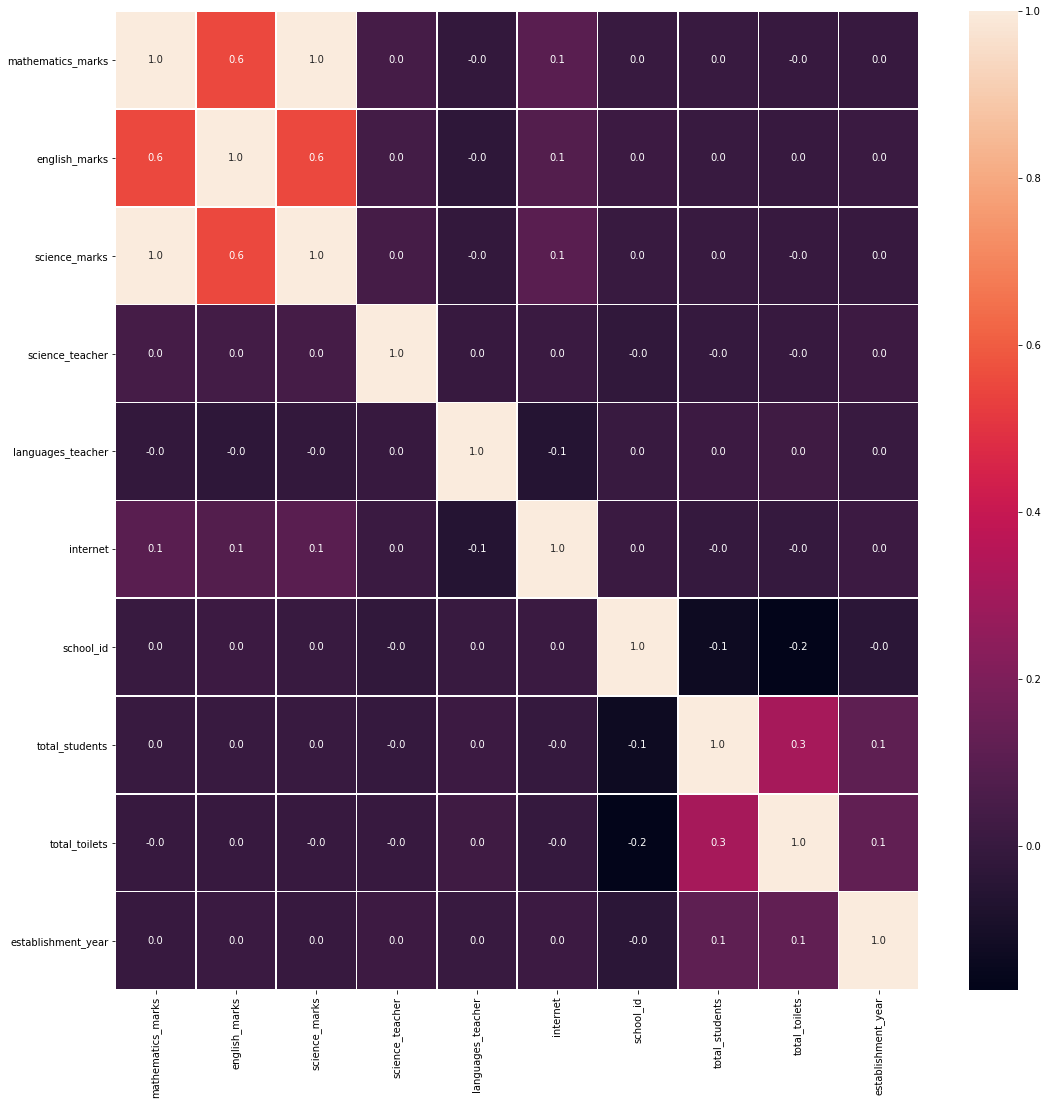

In [7]:
# correlation matrix
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

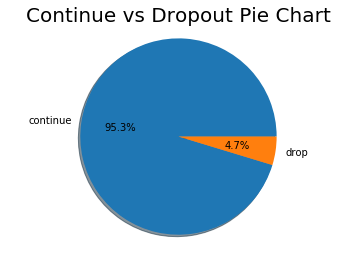

In [8]:
# Students' Marks in Math is absolutely correlated with Science
labels = ['continue', 'drop']
sizes = [data['continue_drop'].value_counts()[0],
         data['continue_drop'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Continue vs Dropout Pie Chart', fontsize=20)
plt.show()
#Above code will show - 95.3% Students continued in school, whereas 4.7% dropped

In [9]:
#Now,cannot use columns with character datatype. Creating Dummy variables instead
columns_to_transform = [ 'gender','caste','guardian','internet' ]
data = pd.get_dummies( data,columns = columns_to_transform )
data.head()

,continue_drop,student_id,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,school_id,total_students,total_toilets,...,caste_BC,caste_OC,caste_SC,caste_ST,guardian_father,guardian_mixed,guardian_mother,guardian_other,internet_False,internet_True
0,continue,s01746,0.666,0.468,0.666,7,6,305,354,86.0,...,1,0,0,0,0,0,0,1,0,1
1,continue,s16986,0.172,0.420,0.172,8,10,331,516,15.0,...,1,0,0,0,0,0,1,0,1,0
2,continue,s00147,0.212,0.601,0.212,1,4,311,209,14.0,...,1,0,0,0,0,0,1,0,1,0
3,continue,s08104,0.434,0.611,0.434,2,5,364,147,28.0,...,0,0,0,1,1,0,0,0,0,1
4,continue,s11132,0.283,0.478,0.283,1,10,394,122,15.0,...,0,0,1,0,0,0,1,0,0,1


In [10]:
mapping_dict={"continue_drop":{"drop":0,"continue":1}}

In [11]:
data.replace(mapping_dict,inplace=True)

In [12]:
#Dropping student_id column
data= data.drop('student_id', 1)

In [13]:
#Ensuring all the columns are of numeric datatype
data.dtypes

continue_drop           int64
mathematics_marks     float64
english_marks         float64
science_marks         float64
science_teacher         int64
languages_teacher       int64
school_id               int64
total_students          int64
total_toilets         float64
establishment_year    float64
gender_F                uint8
gender_M                uint8
caste_BC                uint8
caste_OC                uint8
caste_SC                uint8
caste_ST                uint8
guardian_father         uint8
guardian_mixed          uint8
guardian_mother         uint8
guardian_other          uint8
internet_False          uint8
internet_True           uint8
dtype: object

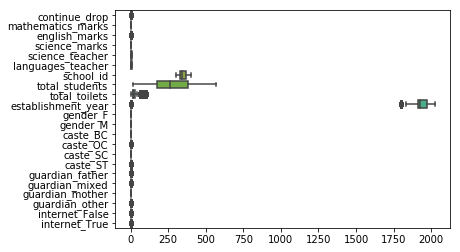

In [14]:
# Checking outliers
fig, ax = plt.subplots()
sns.boxplot(data=data, orient='h')
plt.show()

In [15]:
Q3, Q1 = np.percentile(data['establishment_year'], [75, 25])
iqr = Q3 - Q1
whisker = Q1 - (1.5*iqr)
print('Inter quatile range: ', iqr)
print('Whisker            : ', whisker)

data['establishment_year'] = data['establishment_year'].clip(lower=whisker)

Inter quatile range:  61.0
Whisker            :  1818.5


In [16]:
Q3, Q1 = np.percentile(data['total_toilets'], [75, 25])
iqr = Q3 - Q1
whisker = Q3 + (1.5*iqr)
print('Inter quatile range: ', iqr)
print('Whisker            : ', whisker)

data['total_toilets'] = data['total_toilets'].clip(upper=whisker)

Inter quatile range:  14.0
Whisker            :  49.0


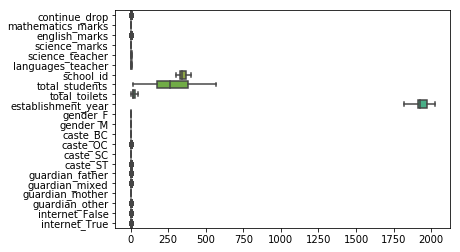

In [17]:
fig, ax = plt.subplots()
sns.boxplot(data=data, orient='h')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92d53c0438>,
      dtype=object)

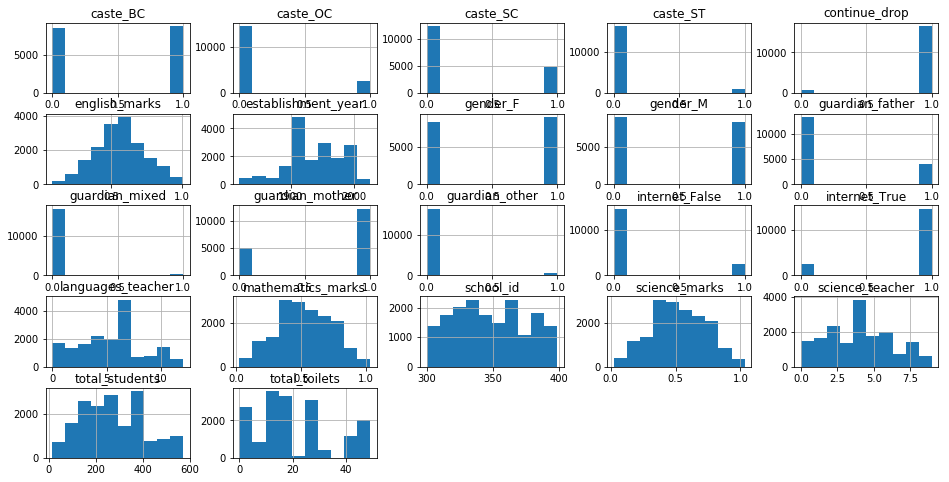

In [18]:
data.hist(figsize=(16,8))

In [19]:
data.columns

Index(['continue_drop', 'mathematics_marks', 'english_marks', 'science_marks',
       'science_teacher', 'languages_teacher', 'school_id', 'total_students',
       'total_toilets', 'establishment_year', 'gender_F', 'gender_M',
       'caste_BC', 'caste_OC', 'caste_SC', 'caste_ST', 'guardian_father',
       'guardian_mixed', 'guardian_mother', 'guardian_other', 'internet_False',
       'internet_True'],
      dtype='object')

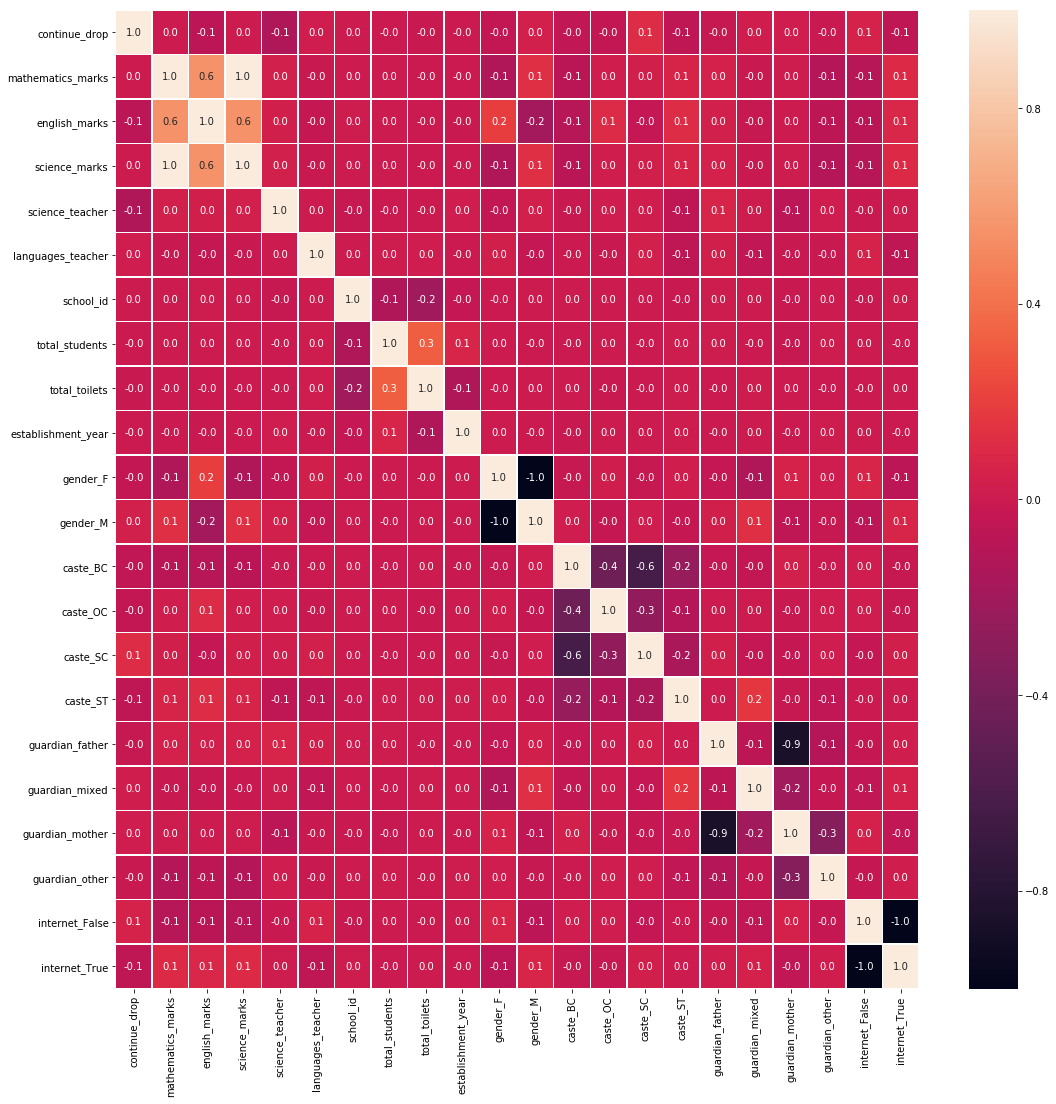

In [20]:
# correlation matrix
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

**Balancing data using Resambling Technique**

In [21]:
from sklearn.utils import resample

In [22]:
# Separate majority and minority classes
data_majority = data[data.continue_drop==1]
data_minority = data[data.continue_drop==0]

In [23]:
# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=16384,    # to match majority class
                                 random_state=123) # reproducible results
 

In [24]:
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

In [25]:
# Display new class counts
data_upsampled.continue_drop.value_counts()

1    16384
0    16384
Name: continue_drop, dtype: int64

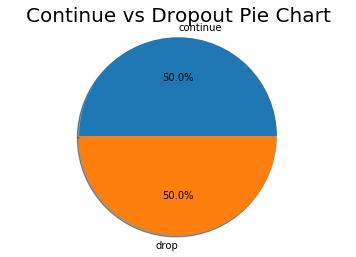

In [26]:
# Students' Marks in Math is absolutely correlated with Science
labels = ['continue', 'drop']
sizes = [data_upsampled['continue_drop'].value_counts()[0],
         data_upsampled['continue_drop'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Continue vs Dropout Pie Chart', fontsize=20)
plt.show()
#Above code will show - 95.3% Students continued in school, whereas 4.7% dropped

Now The ratio of target is 1:1 

## Test dataset

In [27]:
#loading data
data_test=pd.read_csv("test_data_week_1_challenge.csv")
data_test.head()

,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,s00529,F,BC,0.212,0.601,0.212,1,4,mother,False,341,430,44.0,1959.0
1,s13519,F,BC,0.511,0.551,0.511,1,5,mother,True,329,275,60.0,1914.0
2,s01753,M,BC,0.890,0.644,0.890,2,2,mother,True,390,140,14.0,1972.0
3,s00034,F,BC,0.355,0.373,0.355,7,4,mother,True,336,206,17.0,1940.0
4,s03027,F,BC,0.691,0.147,0.691,4,3,father,True,361,287,15.0,1992.0


In [28]:
data_test.drop("student_id",axis=1,inplace=True)

In [29]:
#Now,cannot use columns with character datatype. Creating Dummy variables instead
columns_to_transform = [ 'gender','caste','guardian','internet' ]
data_test = pd.get_dummies( data_test,columns = columns_to_transform )
data_test.head()

,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,school_id,total_students,total_toilets,establishment_year,gender_F,...,caste_BC,caste_OC,caste_SC,caste_ST,guardian_father,guardian_mixed,guardian_mother,guardian_other,internet_False,internet_True
0,0.212,0.601,0.212,1,4,341,430,44.0,1959.0,1,...,1,0,0,0,0,0,1,0,1,0
1,0.511,0.551,0.511,1,5,329,275,60.0,1914.0,1,...,1,0,0,0,0,0,1,0,0,1
2,0.890,0.644,0.890,2,2,390,140,14.0,1972.0,0,...,1,0,0,0,0,0,1,0,0,1
3,0.355,0.373,0.355,7,4,336,206,17.0,1940.0,1,...,1,0,0,0,0,0,1,0,0,1
4,0.691,0.147,0.691,4,3,361,287,15.0,1992.0,1,...,1,0,0,0,1,0,0,0,0,1


In [30]:
data_test.isnull().sum()

mathematics_marks      0
english_marks          0
science_marks          0
science_teacher        0
languages_teacher      0
school_id              0
total_students         0
total_toilets         26
establishment_year    26
gender_F               0
gender_M               0
caste_BC               0
caste_OC               0
caste_SC               0
caste_ST               0
guardian_father        0
guardian_mixed         0
guardian_mother        0
guardian_other         0
internet_False         0
internet_True          0
dtype: int64

In [31]:
data_test=data_test.fillna(0)

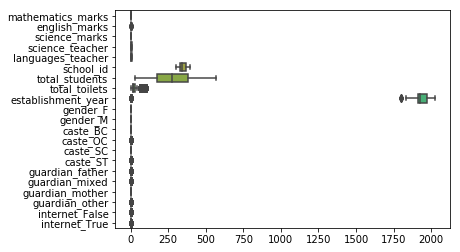

In [32]:
# Checking outliers
fig, ax = plt.subplots()
sns.boxplot(data=data_test, orient='h')
plt.show()

In [33]:
Q3, Q1 = np.percentile(data_test['establishment_year'], [75, 25])
iqr = Q3 - Q1
whisker = Q1 - (1.5*iqr)
print('Inter quatile range: ', iqr)
print('Whisker            : ', whisker)

data_test['establishment_year'] = data_test['establishment_year'].clip(lower=whisker)

Inter quatile range:  61.0
Whisker            :  1818.5


In [34]:
Q3, Q1 = np.percentile(data_test['total_toilets'], [75, 25])
iqr = Q3 - Q1
whisker = Q3 + (1.5*iqr)
print('Inter quatile range: ', iqr)
print('Whisker            : ', whisker)

data_test['total_toilets'] = data_test['total_toilets'].clip(upper=whisker)

Inter quatile range:  14.0
Whisker            :  49.0


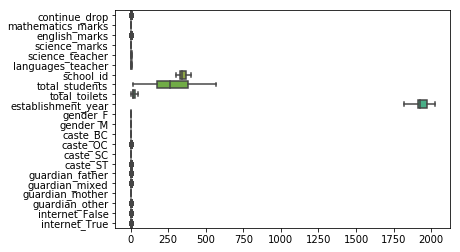

In [35]:
fig, ax = plt.subplots()
sns.boxplot(data=data, orient='h')
plt.show()

## features Selection

In [36]:
x = ['mathematics_marks', 'english_marks', 'science_marks',
       'science_teacher', 'languages_teacher', 'school_id', 'total_students',
       'total_toilets', 'establishment_year', 'gender_F', 'gender_M',
       'caste_BC', 'caste_OC', 'caste_SC', 'caste_ST', 'guardian_father',
       'guardian_mixed', 'guardian_mother', 'guardian_other', 'internet_False',
       'internet_True']

In [37]:
data_upsampled[y].tail(3)

NameError: name 'y' is not defined

In [ ]:
X=data_upsampled.drop("continue_drop", axis=1)
y=data_upsampled["continue_drop"]

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

## Model selection

In [ ]:
#Create and fit the decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)

In [ ]:
#Fit our classifier using the training features and the training target values
clf.fit(X_train,y_train) 


In [ ]:
# Make predictions
#Make predictions using the features from the test data set
predictions = clf.predict(X_test)

In [ ]:
print("f1_score",f1_score(y_test,predictions))
print("accuracy value",accuracy_score(y_test,predictions))

In [ ]:
#with test_data
prediction_out=clf.predict(data_test[x])
prediction_out

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

In [ ]:
# Make predictions
#Make predictions using the features from the test data set
predictions = clf.predict(X_test)

In [ ]:
print("f1_score",f1_score(y_test,predictions))
print("accuracy value",accuracy_score(y_test,predictions))

In [ ]:
predictions

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model=GradientBoostingClassifier()
model.fit(X_train,y_train)

In [ ]:
prediction=model.predict(X_test)

In [ ]:
print("f1_score",f1_score(y_test,prediction))
print("accuracy value",accuracy_score(y_test,prediction))

In [ ]:
prediction

In [ ]:
#prediction using test_dataset 
prediction=model.predict(data_test[x])

In [ ]:
result = np.array(prediction) 

In [ ]:
#saving result
np.save("Results.npy",result)

In [ ]:
# smoote-solve imbalance dataset
# imblearn-solve imbalace dataset
#Data imbalance
# what it is?
#why doing it?
#what data are we balancing
#methods used to balance
#use one method to balance data
